# Activation Maximization with Keras

## 1 - Building and Training a model for MNIST dataset

In [0]:
from __future__ import print_function

import numpy as np
import keras

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 64
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='preds'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 13s 217us/step - loss: 0.2013 - acc: 0.9383 - val_loss: 0.0422 - val_acc: 0.9860
Test loss: 0.04217943321976345
Test accuracy: 0.986


## 2 - Install keras-vis package

In [0]:
!pip install git+https://github.com/raghakot/keras-vis.git --upgrade

  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-5ejmatf8
  Running setup.py bdist_wheel for keras-vis ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-t4dxq0v8/wheels/c5/ae/e7/b34d1cb48b1898f606a5cce08ebc9521fa0588f37f1e590d9f
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


## 3 - Visualizing the output layer for the digit 0

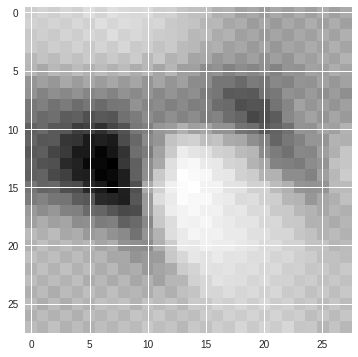

In [0]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (18, 6)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# This is the output node we want to maximize.
filter_idx = 0
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0])


## 3.1 - Specifying the input range

Iteration: 1, named_losses: [('ActivationMax Loss', 0.13321277),
 ('L-6.0 Norm Loss', 0.019825127),
 ('TV(2.0) Loss', 0.09251488)], overall loss: 0.24555277824401855
Iteration: 2, named_losses: [('ActivationMax Loss', -13.98005),
 ('L-6.0 Norm Loss', 0.17341146),
 ('TV(2.0) Loss', 531.6827)], overall loss: 517.8760375976562
Iteration: 3, named_losses: [('ActivationMax Loss', -59.545086),
 ('L-6.0 Norm Loss', 0.17766616),
 ('TV(2.0) Loss', 109.2427)], overall loss: 49.87527847290039
Iteration: 4, named_losses: [('ActivationMax Loss', -111.46145),
 ('L-6.0 Norm Loss', 0.1880037),
 ('TV(2.0) Loss', 122.743454)], overall loss: 11.470008850097656
Iteration: 5, named_losses: [('ActivationMax Loss', -150.29791),
 ('L-6.0 Norm Loss', 0.21633795),
 ('TV(2.0) Loss', 112.35663)], overall loss: -37.724945068359375
Iteration: 6, named_losses: [('ActivationMax Loss', -186.35754),
 ('L-6.0 Norm Loss', 0.2401504),
 ('TV(2.0) Loss', 127.94883)], overall loss: -58.16857147216797
Iteration: 7, named_loss

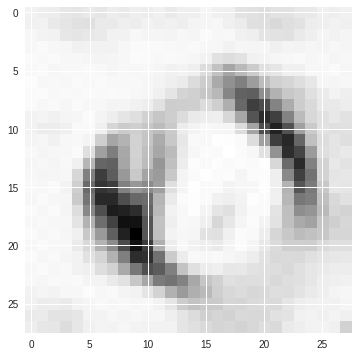

In [0]:
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), verbose=True)
plt.imshow(img[..., 0])

## 4 - Visualizing the activation maximization for all classes (digits 0 to 9)

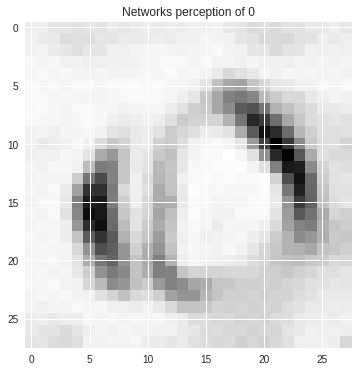

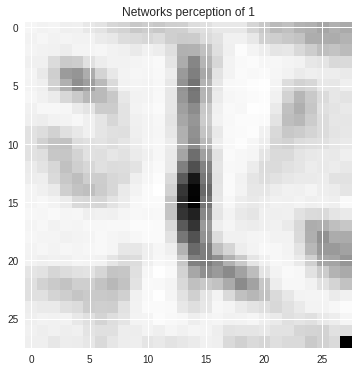

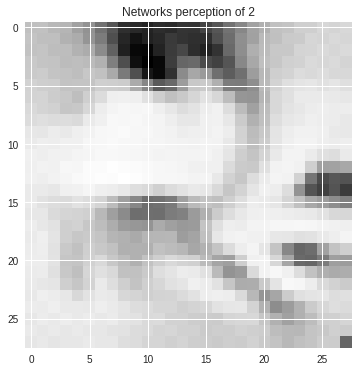

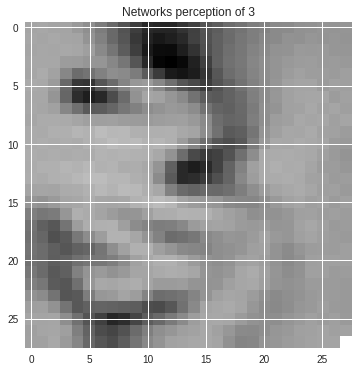

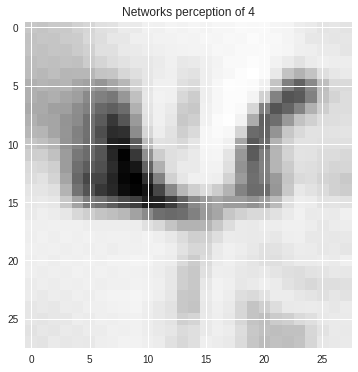

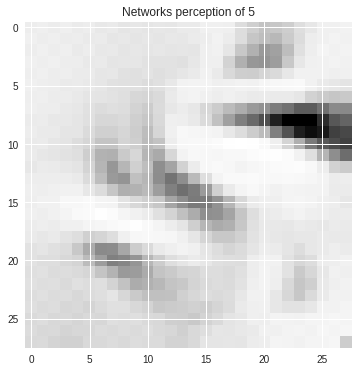

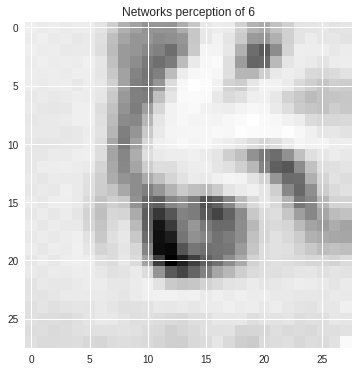

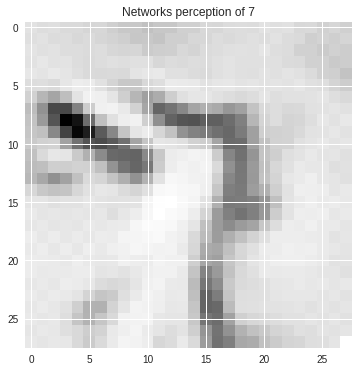

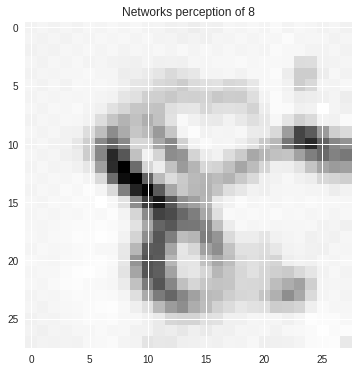

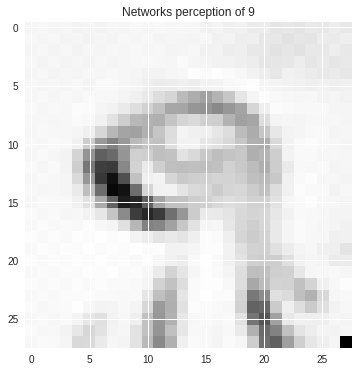

In [0]:
# Generating visualizations for all classes (0-9)
for output_idx in np.arange(10):
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    plt.figure()
    plt.title('Networks perception of {}'.format(output_idx))
    plt.imshow(img[..., 0])